# 1. Reference previous assignment or write some documentation


## About the Data

1. Name / Title: 2018 Central Park Squirrel Census - Squirrel Data
2. Link to Data: https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/about_data
3. Source / Origin: 
	* Author or Creator: The Squirrel Census
	* Publication Date: October 13, 2019
	* Publisher: NYC Open Data
	* Version or Data Accessed: Feb 27, 2025
4. License: Unspecified
5. Can You Use this Data Set for Your Intended Use Case? (TODO answer this question)

## Format and Samples

### Overview

Format: CSV
Size: 748 KB
Number of Records: 3023

### Sample of Data

In [15]:
import pandas as pd
df[["Primary Fur Color", "Above Ground Sighter Measurement", "Date", "X", "Y", "Location"]]

,Primary Fur Color,Above Ground Sighter Measurement,Date,X,Y,Location
0,NaN,NaN,10142018,-73.956134,40.794082,NaN
1,NaN,NaN,10192018,-73.968857,40.783783,NaN
2,Gray,10,10142018,-73.974281,40.775534,Above Ground
3,Gray,NaN,10172018,-73.959641,40.790313,NaN
4,Gray,NaN,10172018,-73.970268,40.776213,Above Ground
...,...,...,...,...,...,...
3018,Gray,FALSE,10072018,-73.963943,40.790868,Ground Plane
3019,Gray,FALSE,10132018,-73.970402,40.782560,Ground Plane
3020,Gray,FALSE,10122018,-73.966587,40.783678,Ground Plane
3021,Gray,FALSE,10102018,-73.963994,40.789915,Ground Plane


### Fields or Column Headers

* Field/Column 1: Primary Fur Color - string
* Field/Column 2: Above Ground Sighter Measurement - int
* Field/Column 3: Date - int
* Field/Column 4: Longitude - float
* Field/Column 5: Latitude - float
* Field/Column 6: Location - string 


# 2. Retrieve the data, create a DataFrame

In [12]:
df= pd.read_csv("../data/raw/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250227.csv")

# 3. Using the Data


### **Analysis Goals: Squirrel Sightings Data Analysis**

#### **1) Visualization: Bar Plot of Primary Fur Color Distribution**
- create a bar plot to visualize the distribution of different fur colors among squirrels
- helps identify the most common fur color in the dataset

#### **2) Type Conversion & Value Counts for What Day Most Squirrels Reported**
- convert the `"Date"` column into a datetime format 
- extract the day from the `"Date"` column to determine which date in October 2018 (month,year of the dataset)had the most squirrel sightings
- use `.value_counts()` to display the number of sightings per day 

#### **3) Calculate Summary Statistics for Squirrels Sighted Above Ground**
- rename `Location` to `AboveOrBelowGround` and filter data to include only squirrels seen **above ground**
- calculate the mean height for squirrels recorded in the `"Above Ground Sighter Measurement"` column

#### **4) Visualization: Geographical Distribution of Squirrels**
- create a scatter plot using latitude (`Y`) and longitude (`X`) to visualize spatial distribution of squirrel sightings to check where squirrels are most frequently observed within the park


#### **1) Visualization: Bar Plot of Primary Fur Color Distribution**

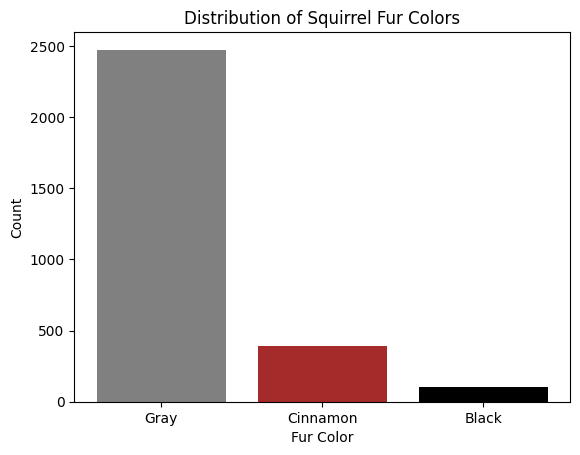

In [26]:
import matplotlib.pyplot as plt 

# count the occurrences of each fur color
fur_color_counts = df['Primary Fur Color'].value_counts()  

# create a bar plot with fur colors on the x axis and their counts on the y axis
plt.bar(fur_color_counts.index, fur_color_counts.values, color=["gray", "brown", "black"])  

plt.title("Distribution of Squirrel Fur Colors")  
plt.xlabel("Fur Color")  
plt.ylabel("Count")  

# display the barchart
plt.show()  


#### **2) Type Conversion & Value Counts for What Day Most Squirrels Reported**

In [88]:
# convert the date column into datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%m%d%Y")  

# extract the day from the date column and count the number of sightings for each day in october
day_counts = df["Date"].dt.day.value_counts().sort_values(ascending=False)  

# get the most common day and its count
most_common_day = day_counts.head(1).index[0]  # get the day with the highest count
most_common_count = day_counts.head(1).values[0]  # get the highest count

# print the most common day for squirrel sightings
print(f"Day {most_common_day} of October 2018 had {most_common_count} squirrel sightings")

Day 13 of October 2018 had 434 squirrel sightings


#### **3) Calculate Summary Statistics for Squirrels Sighted Above Ground**

In [90]:
# rename location column to AboveOrBelowGround for clarity
df = df.rename({'Location': 'AboveOrBelowGround'}, axis=1)  

# extract squirrels that were seen above ground
above_ground_squirrels = df[df['AboveOrBelowGround'] == 'Above Ground']  

# extract the Above Ground Sighter Measurement  
above_ground_measurements = above_ground_squirrels['Above Ground Sighter Measurement']  

# get the non null values  
above_ground_measurements = above_ground_measurements.dropna()  

# make sure the column is of type int before getting the summary statistics  
summary_stats = above_ground_measurements.astype(int).describe()  

# print the summary statistics
print(summary_stats)

mean_height = summary_stats["mean"]
print(f"the mean height for squirrels seen above ground is {mean_height:.2f} meters")

count    793.000000
mean      15.210593
std       15.502925
min        0.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      180.000000
Name: Above Ground Sighter Measurement, dtype: float64
the mean height for squirrels seen above ground is 15.21 meters


#### **4) Visualization: Geographical Distribution of Squirrels**

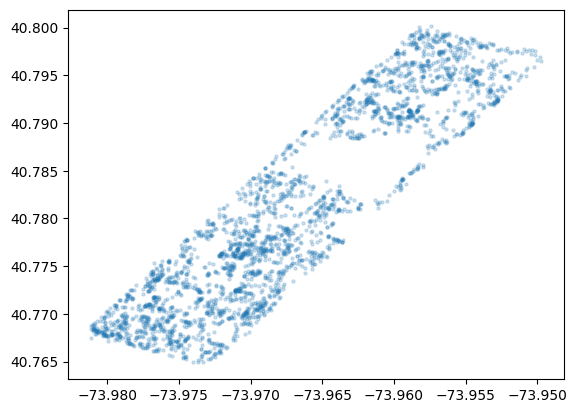

In [74]:
#4) visualization: distribution of squirrels based on geographical location 
#want dataframe where it has both longitude and latitude
df=df.dropna(subset=['X','Y'])

x=df["X"]
y=df["Y"]
plt.scatter(x, y,  alpha=0.2, s=5)
plt.show()
